In [3]:
import pandas as pd
import numpy as np

In [4]:
file_path = r"U:\nlp_project\flight-prices-prediction\data\train.csv"
data = pd.read_csv(file_path)

In [5]:
method="spearman"

In [8]:
cm = data.corr(method=method, numeric_only=True)

# mask = np.zeros_like(cm, dtype=bool)

In [9]:
cm

,duration,total_stops,price
duration,1.000000,0.820952,0.691259
total_stops,0.820952,1.000000,0.715709
price,0.691259,0.715709,1.000000


In [9]:
mask = np.zeros_like(cm, dtype=bool)

In [10]:
mask

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [11]:
mask[np.triu_indices_from(mask)] = True

In [12]:
mask

array([[ True,  True,  True],
       [False,  True,  True],
       [False, False,  True]])

- cat_summary:

In [10]:
var = "airline"

In [11]:
col = data.loc[:, var].copy()

In [12]:
col

0         Air India
1         Air India
2       Jet Airways
3            Indigo
4         Air India
           ...     
8363         Indigo
8364    Jet Airways
8365         Indigo
8366         Indigo
8367    Jet Airways
Name: airline, Length: 8368, dtype: object

In [13]:
col.value_counts()

airline
Jet Airways          3000
Indigo               1611
Air India            1358
Multiple Carriers     941
Spicejet              649
Vistara               393
Air Asia              258
Goair                 157
Trujet                  1
Name: count, dtype: int64

In [21]:
col.value_counts().pipe(lambda ser: pd.concat(
    [
        ser,
        col.value_counts(normalize=True)
    ],
    axis=1
)).set_axis(["count", "percentage"], axis=1).rename_axis(index="category")

,count,percentage
category,,
Jet Airways,3000,0.358509
Indigo,1611,0.192519
Air India,1358,0.162285
Multiple Carriers,941,0.112452
Spicejet,649,0.077557
Vistara,393,0.046965
Air Asia,258,0.030832
Goair,157,0.018762
Trujet,1,0.000120


In [25]:
display(list(data.groupby(by="date_of_journey")))

[('2019-03-01',
            airline date_of_journey    source destination  dep_time  \
  1       Air India      2019-03-01  Banglore   New Delhi  08:50:00   
  71          Goair      2019-03-01  Banglore   New Delhi  15:45:00   
  313   Jet Airways      2019-03-01  Banglore   New Delhi  05:45:00   
  317     Air India      2019-03-01    Mumbai   Hyderabad  13:55:00   
  378   Jet Airways      2019-03-01  Banglore   New Delhi  09:45:00   
  ...           ...             ...       ...         ...       ...   
  8101       Indigo      2019-03-01  Banglore   New Delhi  16:15:00   
  8186      Vistara      2019-03-01   Chennai     Kolkata  07:05:00   
  8210  Jet Airways      2019-03-01  Banglore   New Delhi  18:40:00   
  8233    Air India      2019-03-01  Banglore   New Delhi  11:05:00   
  8275    Air India      2019-03-01  Banglore   New Delhi  06:10:00   
  
       arrival_time  duration  total_stops  additional_info  price  
  1        23:55:00      2345          2.0          No Info 

In [30]:
list(data.groupby(by="date_of_journey").price.mean())

[19813.462025316454,
 11994.382113821139,
 13941.215189873417,
 10251.47280334728,
 11814.982300884956,
 7247.212121212121,
 8945.897637795275,
 8011.3125,
 8750.238461538462,
 7184.554545454545,
 7505.004761904762,
 4364.666666666667,
 4774.556962025316,
 6460.442307692308,
 5167.66,
 5148.805555555556,
 5286.25,
 5650.377049180328,
 4933.104477611941,
 5245.28,
 8860.090497737556,
 4639.266666666666,
 9004.767857142857,
 9558.694369973191,
 8704.057142857142,
 8746.751497005987,
 9895.368421052632,
 9795.532663316582,
 8809.481012658227,
 9075.159863945579,
 8774.16796875,
 8996.946360153257,
 9453.61757105943,
 9611.824797843667,
 9140.173333333334,
 8572.043824701195,
 4678.252747252747,
 4947.444444444444,
 8463.319391634981,
 8515.335820895523]

In [ ]:
list((
    data
    .assign(date_of_journey=pd.to_datetime(data["date_of_journey"],dayfirst=True, format="mixed"))
    .groupby(by="date_of_journey")
))

[(Timestamp('2019-03-01 00:00:00'),
            airline date_of_journey    source destination  dep_time  \
  1       Air India      2019-03-01  Banglore   New Delhi  08:50:00   
  71          Goair      2019-03-01  Banglore   New Delhi  15:45:00   
  313   Jet Airways      2019-03-01  Banglore   New Delhi  05:45:00   
  317     Air India      2019-03-01    Mumbai   Hyderabad  13:55:00   
  378   Jet Airways      2019-03-01  Banglore   New Delhi  09:45:00   
  ...           ...             ...       ...         ...       ...   
  8101       Indigo      2019-03-01  Banglore   New Delhi  16:15:00   
  8186      Vistara      2019-03-01   Chennai     Kolkata  07:05:00   
  8210  Jet Airways      2019-03-01  Banglore   New Delhi  18:40:00   
  8233    Air India      2019-03-01  Banglore   New Delhi  11:05:00   
  8275    Air India      2019-03-01  Banglore   New Delhi  06:10:00   
  
       arrival_time  duration  total_stops  additional_info  price  
  1        23:55:00      2345          2

In [54]:
list((
    data
    .assign(date_of_journey=pd.to_datetime(data["date_of_journey"],dayfirst=True, format="mixed"))
    .groupby(pd.Grouper(key="date_of_journey", freq="M"))
    .price
    .mean()
))

C:\Users\Naruto\AppData\Local\Temp\ipykernel_23272\3199621530.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="date_of_journey", freq="M"))


[10671.630181648812, 5810.574592074592, 9153.084363636364, 8716.811710677383]

C:\Users\Naruto\AppData\Local\Temp\ipykernel_23272\801339058.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="date_of_journey", freq="M"))


<Axes: xlabel='month'>

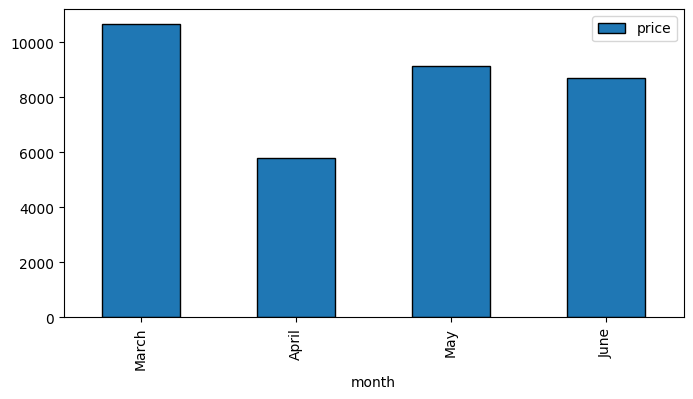

In [39]:
(
	data
    .assign(**{
        col: pd.to_datetime(data.loc[:, col], dayfirst=True, format="mixed")
        for col in ["date_of_journey"]
    })
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

# ax = plt.gca()
# eda_helper_functions.rotate_xlabels(ax)

C:\Users\Naruto\AppData\Local\Temp\ipykernel_23272\1224164235.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])


<Axes: xlabel='month'>

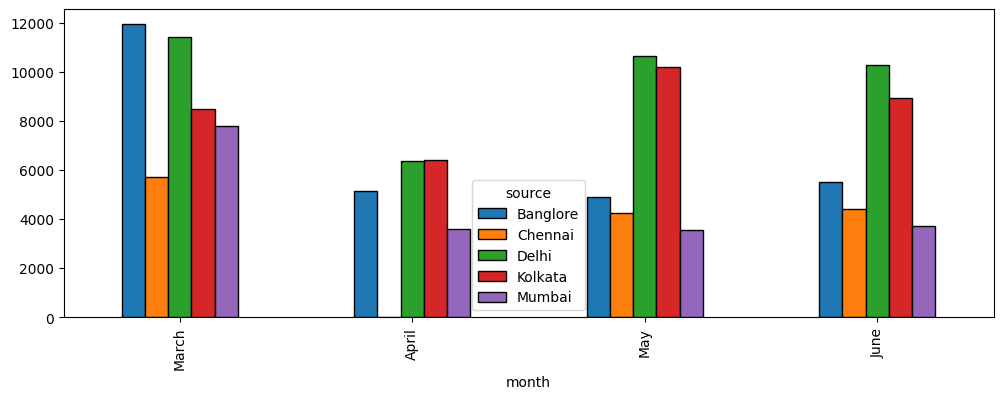

In [65]:
(
	data
    .assign(date_of_journey=pd.to_datetime(data["date_of_journey"],dayfirst=True, format="mixed"))
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)
